In [1]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker
import matplotlib.patches as patches
import os
# os.environ['CARTOPY_USER_BACKGROUNDS'] = 'D:/Data/NaturalEarthData'

# 读取nc文件
file_path = 'D:/data/NSOAS/MUL/MUL_OPER_nrt_global_allsat_phy_20241215_20241217_T.nc'

nc = Dataset(file_path)

# 打印所有变量名称
print(nc.variables.keys())

# 提取参数
lon = nc.variables['lon'][:]
lat = nc.variables['lat'][:]
adt = nc.variables['adt'][:]
ugos = nc.variables['u'][:]
vgos = nc.variables['v'][:]
sla = nc.variables['sla'][:]
ua = nc.variables['ua'][:]
va = nc.variables['va'][:]

dict_keys(['lat', 'lon', 'sla', 'err', 'adt', 'u', 'ua', 'v', 'va'])


In [2]:
INVALID_VALUE = -214748.3647

adt = np.ma.masked_equal(adt, INVALID_VALUE)
ugos = np.ma.masked_equal(ugos, INVALID_VALUE)
vgos = np.ma.masked_equal(vgos, INVALID_VALUE)
sla = np.ma.masked_equal(sla, INVALID_VALUE)
ua = np.ma.masked_equal(ua, INVALID_VALUE)
va = np.ma.masked_equal(va, INVALID_VALUE)

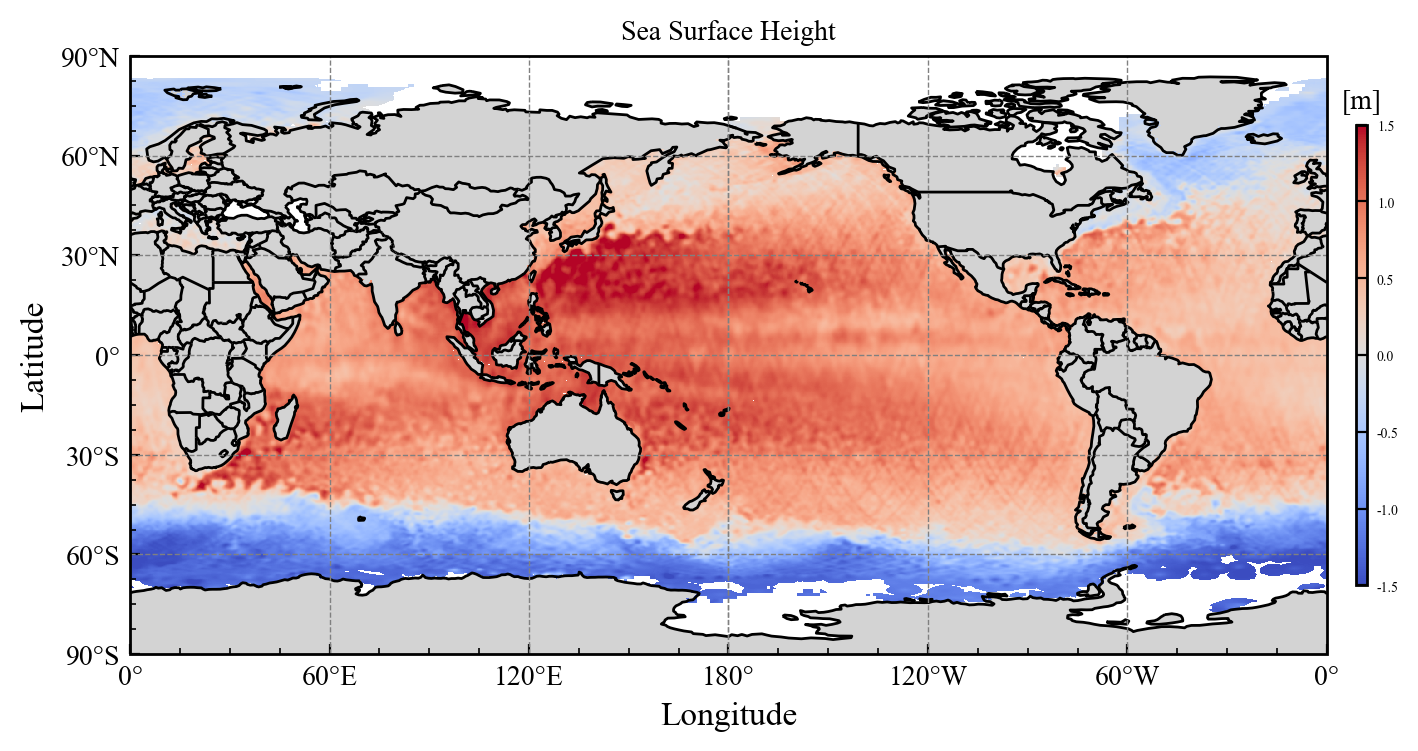

In [3]:
# 绘制adt空间分布图
# 设置图形参数
plt.rcParams['font.size'] = 8
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.1
plt.rcParams['font.family'] = 'Times New Roman'

# 创建图形并设置大小
fig = plt.figure(figsize=(8, 6), dpi=200)  # 调整大小
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.15)  # 调整边距

# 创建投影
ax1 = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# 添加陆地背景
ax1.add_feature(cfeature.LAND, facecolor='lightgrey')
ax1.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)

# 绘制ADT分布图，并限制颜色映射范围
c = ax1.pcolormesh(lon, lat, adt, shading='auto', cmap='coolwarm', vmin=-1.5, vmax=1.5, transform=ccrs.PlateCarree())

# 添加颜色条并调整范围
cbar = fig.colorbar(c, ax=ax1, orientation='vertical', pad=0.02, shrink=0.4, aspect=40)
cbar.ax.set_title("[m]", fontsize=10)
cbar.ax.yaxis.set_label_position('right')
cbar.minorticks_off()
cbar.ax.tick_params(length=4,labelsize=5)


# 设置标题
ax1.set_title("Sea Surface Height", fontsize=10)

# 添加海岸线, 有10m, 50m, 110m三种分辨率
ax1.coastlines(resolution='110m', linewidth=1)

# 设置刻度
ax1.set_xticks(np.arange(-180, 180, 30), crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())
ax1.xaxis.set_major_locator(mticker.MultipleLocator(60)) # 设置主刻度间隔
ax1.xaxis.set_minor_locator(mticker.AutoMinorLocator(4)) # 设置次刻度间隔


# 设置刻度标签大小
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.tick_params(axis='both', which='minor', labelsize=8)

# 设置坐标轴
ax1.set_xlabel("Longitude", fontsize=12)
ax1.set_ylabel("Latitude", fontsize=12)

# 添加网格线
gridlines = ax1.gridlines(draw_labels=False, linestyle='--', linewidth=0.5, color='grey')

# 保存图像到指定目录
output_path = "D:/Data/NSOAS/MUL/SSH.png"
plt.savefig(output_path, format='png')

plt.tight_layout()
plt.show()

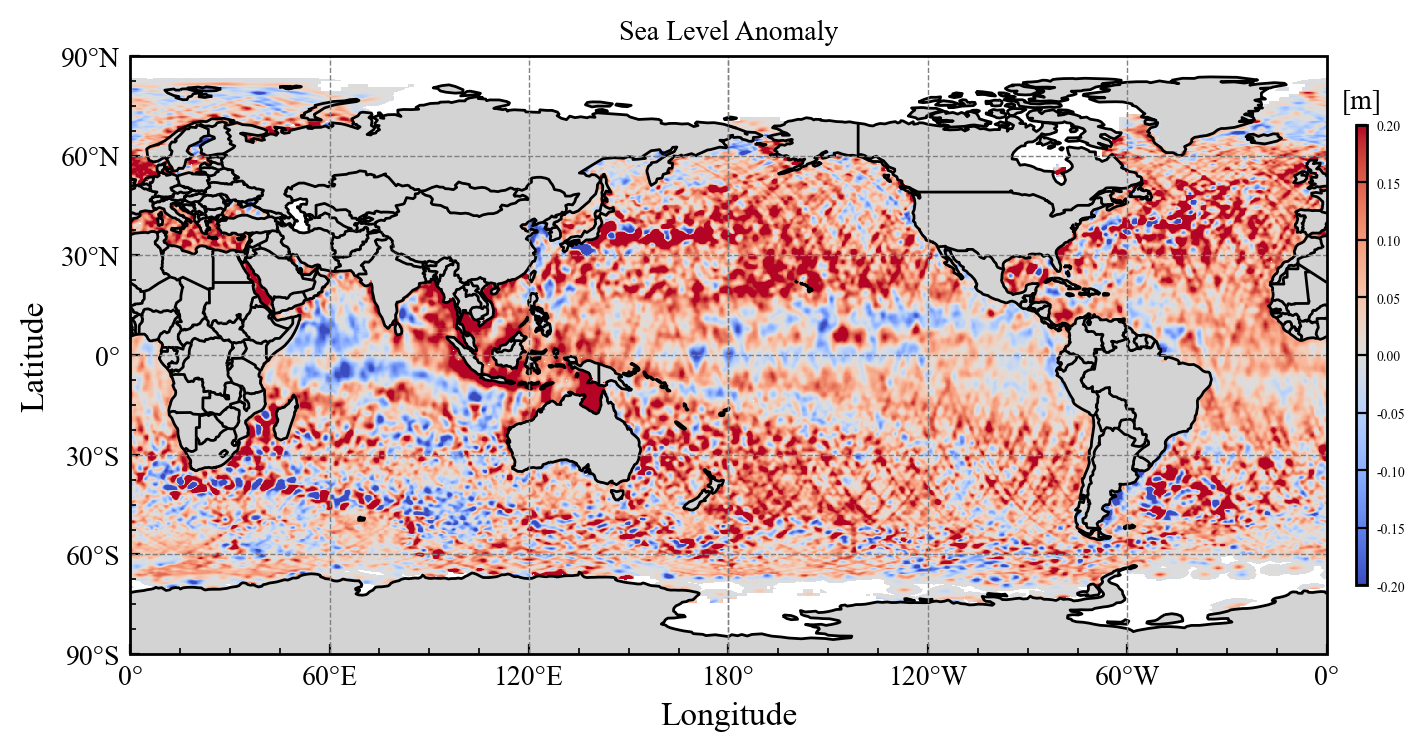

In [3]:
# 绘制adt空间分布图
# 设置图形参数
plt.rcParams['font.size'] = 8
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.1
plt.rcParams['font.family'] = 'Times New Roman'

# 创建图形并设置大小
fig = plt.figure(figsize=(8, 6), dpi=200)  # 调整大小
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.15)  # 调整边距

# 创建投影
ax1 = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# 添加陆地背景
ax1.add_feature(cfeature.LAND, facecolor='lightgrey')
ax1.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)

# 绘制ADT分布图，并限制颜色映射范围
c = ax1.pcolormesh(lon, lat, sla, shading='auto', cmap='coolwarm', vmin=-0.2, vmax=0.2, transform=ccrs.PlateCarree())

# 添加颜色条并调整范围
cbar = fig.colorbar(c, ax=ax1, orientation='vertical', pad=0.02, shrink=0.4, aspect=40)
cbar.ax.set_title("[m]", fontsize=10)
cbar.ax.yaxis.set_label_position('right')
cbar.minorticks_off()
cbar.ax.tick_params(length=4,labelsize=5)

# 设置标题
ax1.set_title("Sea Level Anomaly", fontsize=10)

# 添加海岸线, 有10m, 50m, 110m三种分辨率
ax1.coastlines(resolution='110m', linewidth=1)

# 设置刻度
ax1.set_xticks(np.arange(-180, 180, 30), crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())
ax1.xaxis.set_major_locator(mticker.MultipleLocator(60))
ax1.xaxis.set_minor_locator(mticker.AutoMinorLocator(4))

# 设置刻度标签大小
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.tick_params(axis='both', which='minor', labelsize=8)

# 设置坐标轴
ax1.set_xlabel("Longitude", fontsize=12)
ax1.set_ylabel("Latitude", fontsize=12)

# 添加网格线
gridlines = ax1.gridlines(draw_labels=False, linestyle='--', linewidth=0.5, color='grey')

# 保存图像到指定目录
output_path = "D:/Data/NSOAS/MUL/SLA.png"
plt.savefig(output_path, format='png')

plt.tight_layout()
plt.show()

### 1. 对NSOAS 海表温度数据进行可视化

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as patches
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import os

file_path = 'D:/data/NSOAS/MUL/MUL_OPER_SST_L4A_FU_01D_20241215_dps_050_10_sst.nc'
nc = Dataset(file_path)

print(nc.variables.keys())

dict_keys(['SST'])


### 2. 读取数据并进行预处理
由于原始SST的nc文件中并不包含经纬度信息，所以需要手动创建lon、lat。
变量SST的维度大小为 7200*3600，按照经纬度范围[0 ~ 360°, 90° ~ -90°]，可判断该变量的空间分辨率为1/20° x 1/20°，也就是5km x 5km，从文件名也可以判断它的分辨率。
但由于工作流所需要的SST空间分辨率为4km x 4km，所以需要对其进行插值处理，插值的代码可参考`/datadisk1/ftp_app/SST_nc_data.py`, 在此不作赘述。

In [23]:
SST = nc.variables['SST'][:]
# 创建 lon 和 lat 变量， 并只保留小数点后三位
lon = np.round(np.linspace(1/40, 360 - 1/40, 7200), 3)
lat = np.round(np.linspace(90 - 1/40, -90 + 1/40, 3600), 3)   # 这里需要注意，SST矩阵中的纬度是从90到-90，而不是从-90到90

# 找到SST矩阵的FillValue， 并将其替换为np.nan或者mask掉，一般来说，FillValue是一个很大的负数
print(np.min(SST))
# SST = np.where(SST == np.min(SST), np.nan, SST)
SST = np.ma.masked_equal(SST, np.min(SST))
SST = np.ma.masked_equal(SST, -2)   # mask掉最小值后，再mask掉-2，这样就可以保证-2不会被绘制出来
SST = np.ma.masked_equal(SST, 0)

print(f"最小值:",np.min(SST),"最大值:",np.max(SST))

print("To NSOAS: 不会做数据就别做，就这水平还有脸把这种不规范的数据推送过来，还有脸说是高质量数据，真是服了，没有经纬度信息也就算了，用-9999、-2、0三个常量当作是Fille value，你咋不上天？") 
print("=============================================")
print("🖕🖕🖕🖕🖕🖕Fuck you🖕🖕🖕🖕🖕🖕🖕🖕")
print("🖕🖕🖕🖕🖕害老子找半天bug🖕🖕🖕🖕🖕🖕🖕")
print("============================================")

-9999.0
最小值: -0.0018531105 最大值: 32.72
To NSOAS: 不会做数据就别做，就这水平还有脸把这种不规范的数据推送过来，还有脸说是高质量数据，真是服了，没有经纬度信息也就算了，用-9999、-2、0三个常量当作是Fille value，你咋不上天？
🖕🖕🖕🖕🖕🖕Fuck you🖕🖕🖕🖕🖕🖕🖕🖕
🖕🖕🖕🖕🖕害老子找半天bug🖕🖕🖕🖕🖕🖕🖕


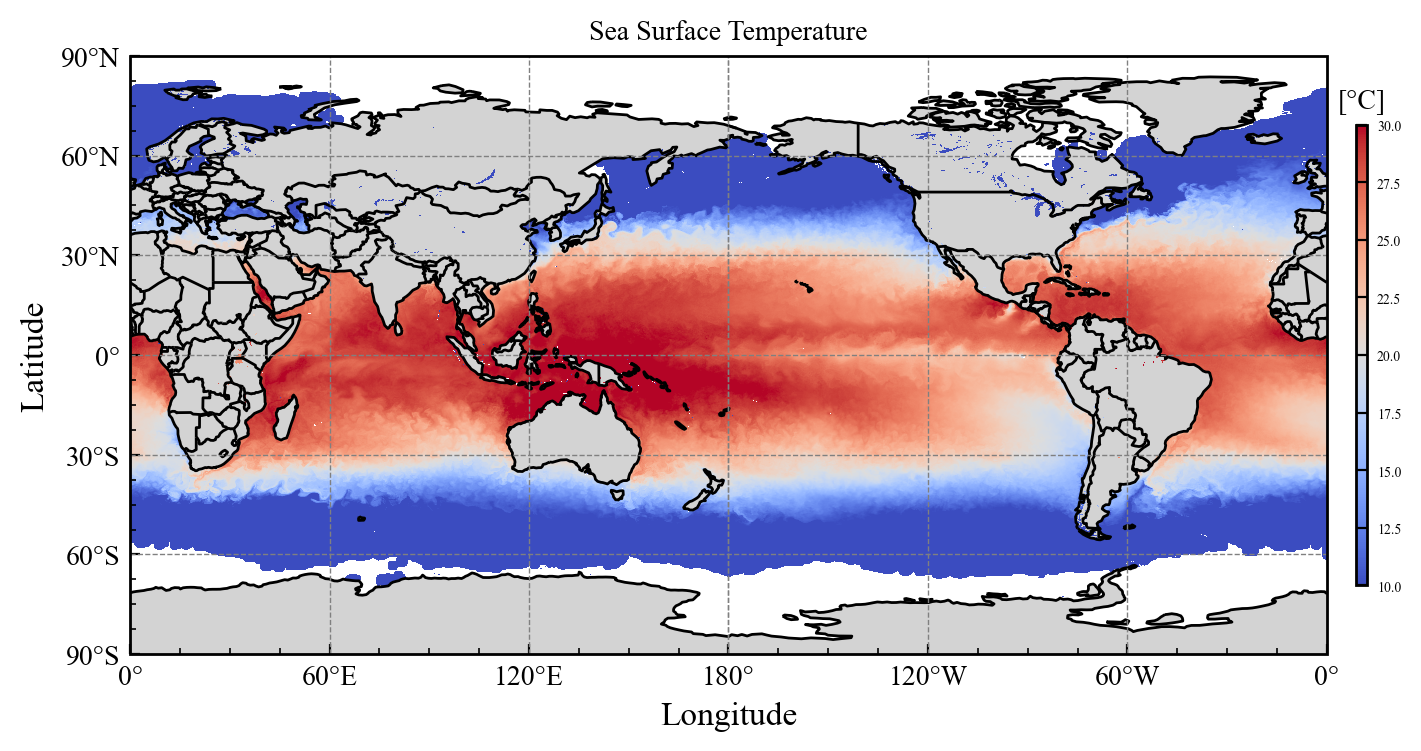

In [24]:
# 对SST数据进行可视化
plt.rcParams['font.size'] = 8
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.1
plt.rcParams['font.family'] = 'Times New Roman'

# 创建图形并设置大小
fig = plt.figure(figsize=(8, 6), dpi=200)
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.15)

# 创建投影
ax1 = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# 绘制SST分布图，并限制颜色映射范围
c = ax1.pcolormesh(lon, lat, SST, shading='auto', cmap='coolwarm', vmin=10, vmax=30, transform=ccrs.PlateCarree())

# 添加陆地背景
ax1.add_feature(cfeature.LAND, facecolor='lightgrey')
ax1.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)


# 添加颜色条并调整范围
cbar = fig.colorbar(c, ax=ax1, orientation='vertical', pad=0.02, shrink=0.4, aspect=40)
cbar.ax.set_title("[°C]", fontsize=10)
cbar.ax.yaxis.set_label_position('right')
cbar.minorticks_off()
cbar.ax.tick_params(length=4,labelsize=5)

# 设置标题
ax1.set_title("Sea Surface Temperature", fontsize=10)

# 添加海岸线, 有10m, 50m, 110m三种分辨率
ax1.coastlines(resolution='110m', linewidth=1)

# 设置刻度
ax1.set_xticks(np.arange(-180, 180, 30), crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())
ax1.xaxis.set_major_locator(mticker.MultipleLocator(60))
ax1.xaxis.set_minor_locator(mticker.AutoMinorLocator(4))

# 设置刻度标签大小
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.tick_params(axis='both', which='minor', labelsize=8)

# 设置坐标轴
ax1.set_xlabel("Longitude", fontsize=12)
ax1.set_ylabel("Latitude", fontsize=12)

# 添加网格线
gridlines = ax1.gridlines(draw_labels=False, linestyle='--', linewidth=0.5, color='grey')

# 保存图像到指定目录
output_path = "D:/Data/NSOAS/MUL/SST.png"
plt.savefig(output_path, format='png')

plt.tight_layout()
plt.show()
